In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("Updated_Season2_with_Polar - Merged_Season.csv")

In [ ]:
data.shape

(3111, 115)

In [ ]:
for column in data.columns:
    print(f"Column '{column}': {data[column].isna().sum()} null values")

Column 'Athlete': 0 null values
Column 'Date': 0 null values
Column 'RHR': 1130 null values
Column 'HRV': 1130 null values
Column 'Recovery': 1130 null values
Column 'Sleep.Score': 1130 null values
Column 'Hours.in.Bed': 1130 null values
Column 'Hours.of.Sleep': 1130 null values
Column 'Sleep.Need': 1130 null values
Column 'Sleep.Efficiency....': 1130 null values
Column 'Wake.Periods': 1490 null values
Column 'Sleep.Disturbances': 1130 null values
Column 'Latency..min.': 1130 null values
Column 'Cycles': 1130 null values
Column 'REM.Sleep..hours.': 1130 null values
Column 'Deep.Sleep..hours.': 1130 null values
Column 'Light.Sleep..hours.': 1130 null values
Column 'Awake..hours.': 1130 null values
Column 'Sleep.Debt..hours.': 1130 null values
Column 'Sleep.Consistency': 1401 null values
Column 'Respiratory.Rate': 1134 null values
Column 'Total.Cycle.Sleep.Time..hours.': 1130 null values
Column 'REM.Percentage': 1130 null values
Column 'Deep.Sleep.Percentage': 1130 null values
Column 'Re

In [ ]:
for column in data.columns:
  if data[column].isna().sum()>1555 and column!='RSI Mean':
    data.drop(column, axis=1, inplace=True)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
for column in data.columns:
      if data[column].dtype == 'object':
        data.drop(column, axis=1, inplace=True)

In [ ]:
data.shape

(3111, 100)

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0, estimator=RandomForestRegressor(n_estimators=10, random_state=0))
imp.fit(data)
data=pd.DataFrame(imp.fit_transform(data),columns=data.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
data.to_csv('/content/imputed_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

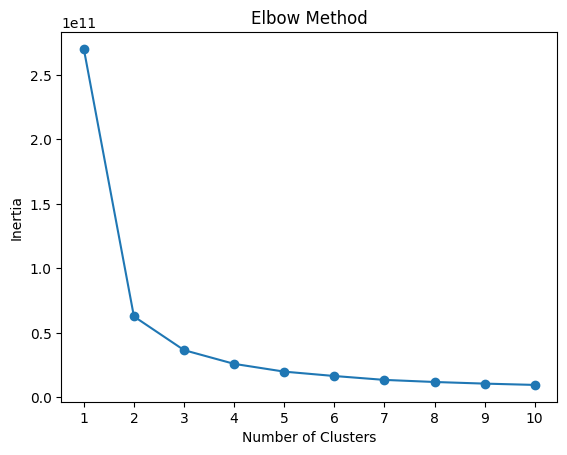

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the columns for clustering

X = data

# Initialize empty list to store inertia values
inertia_values = []

# Define range of cluster numbers to try
cluster_range = range(1, 11)

# Calculate inertia (within-cluster sum of squares) for different number of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(cluster_range)
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Extract the columns for clustering

X = data

# Define the number of clusters
num_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels
print(data[ 'Cluster'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       0
1       2
2       0
3       2
4       1
       ..
3106    2
3107    2
3108    2
3109    2
3110    2
Name: Cluster, Length: 3111, dtype: int32


In [ ]:
from collections import Counter
print(Counter(cluster_labels))

Counter({2: 1730, 1: 880, 0: 501})


In [ ]:
import pandas as pd

# Assuming data is your DataFrame
data_description = data.describe()

# Transpose the DataFrame for better readability
data_description = data_description.T

# Print the transposed DataFrame
print(data_description)

                                 count       mean        std      min  \
RHR                             3111.0  59.036419   7.305068  39.0000   
HRV                             3111.0  89.962777  30.680568  14.0000   
Recovery                        3111.0  64.051366  19.465558   1.0000   
Sleep.Score                     3111.0  75.945998  14.931657  10.0000   
Hours.in.Bed                    3111.0   7.846413   1.540502   1.0500   
Hours.of.Sleep                  3111.0   6.996491   1.326435   0.8200   
Sleep.Need                      3111.0   9.142902   0.969024   1.2300   
Sleep.Efficiency....            3111.0  89.191835   5.046883  16.0000   
Wake.Periods                    3111.0  14.932176   5.251266   2.0000   
Sleep.Disturbances              3111.0  12.719190   4.715225   0.0000   
Latency..min.                   3111.0   2.731451   4.284491   0.0000   
Cycles                          3111.0   5.696046   1.848707   0.0000   
REM.Sleep..hours.               3111.0   2.187220  

In [ ]:
data=pd.read_csv("/content/imputed_data.csv")

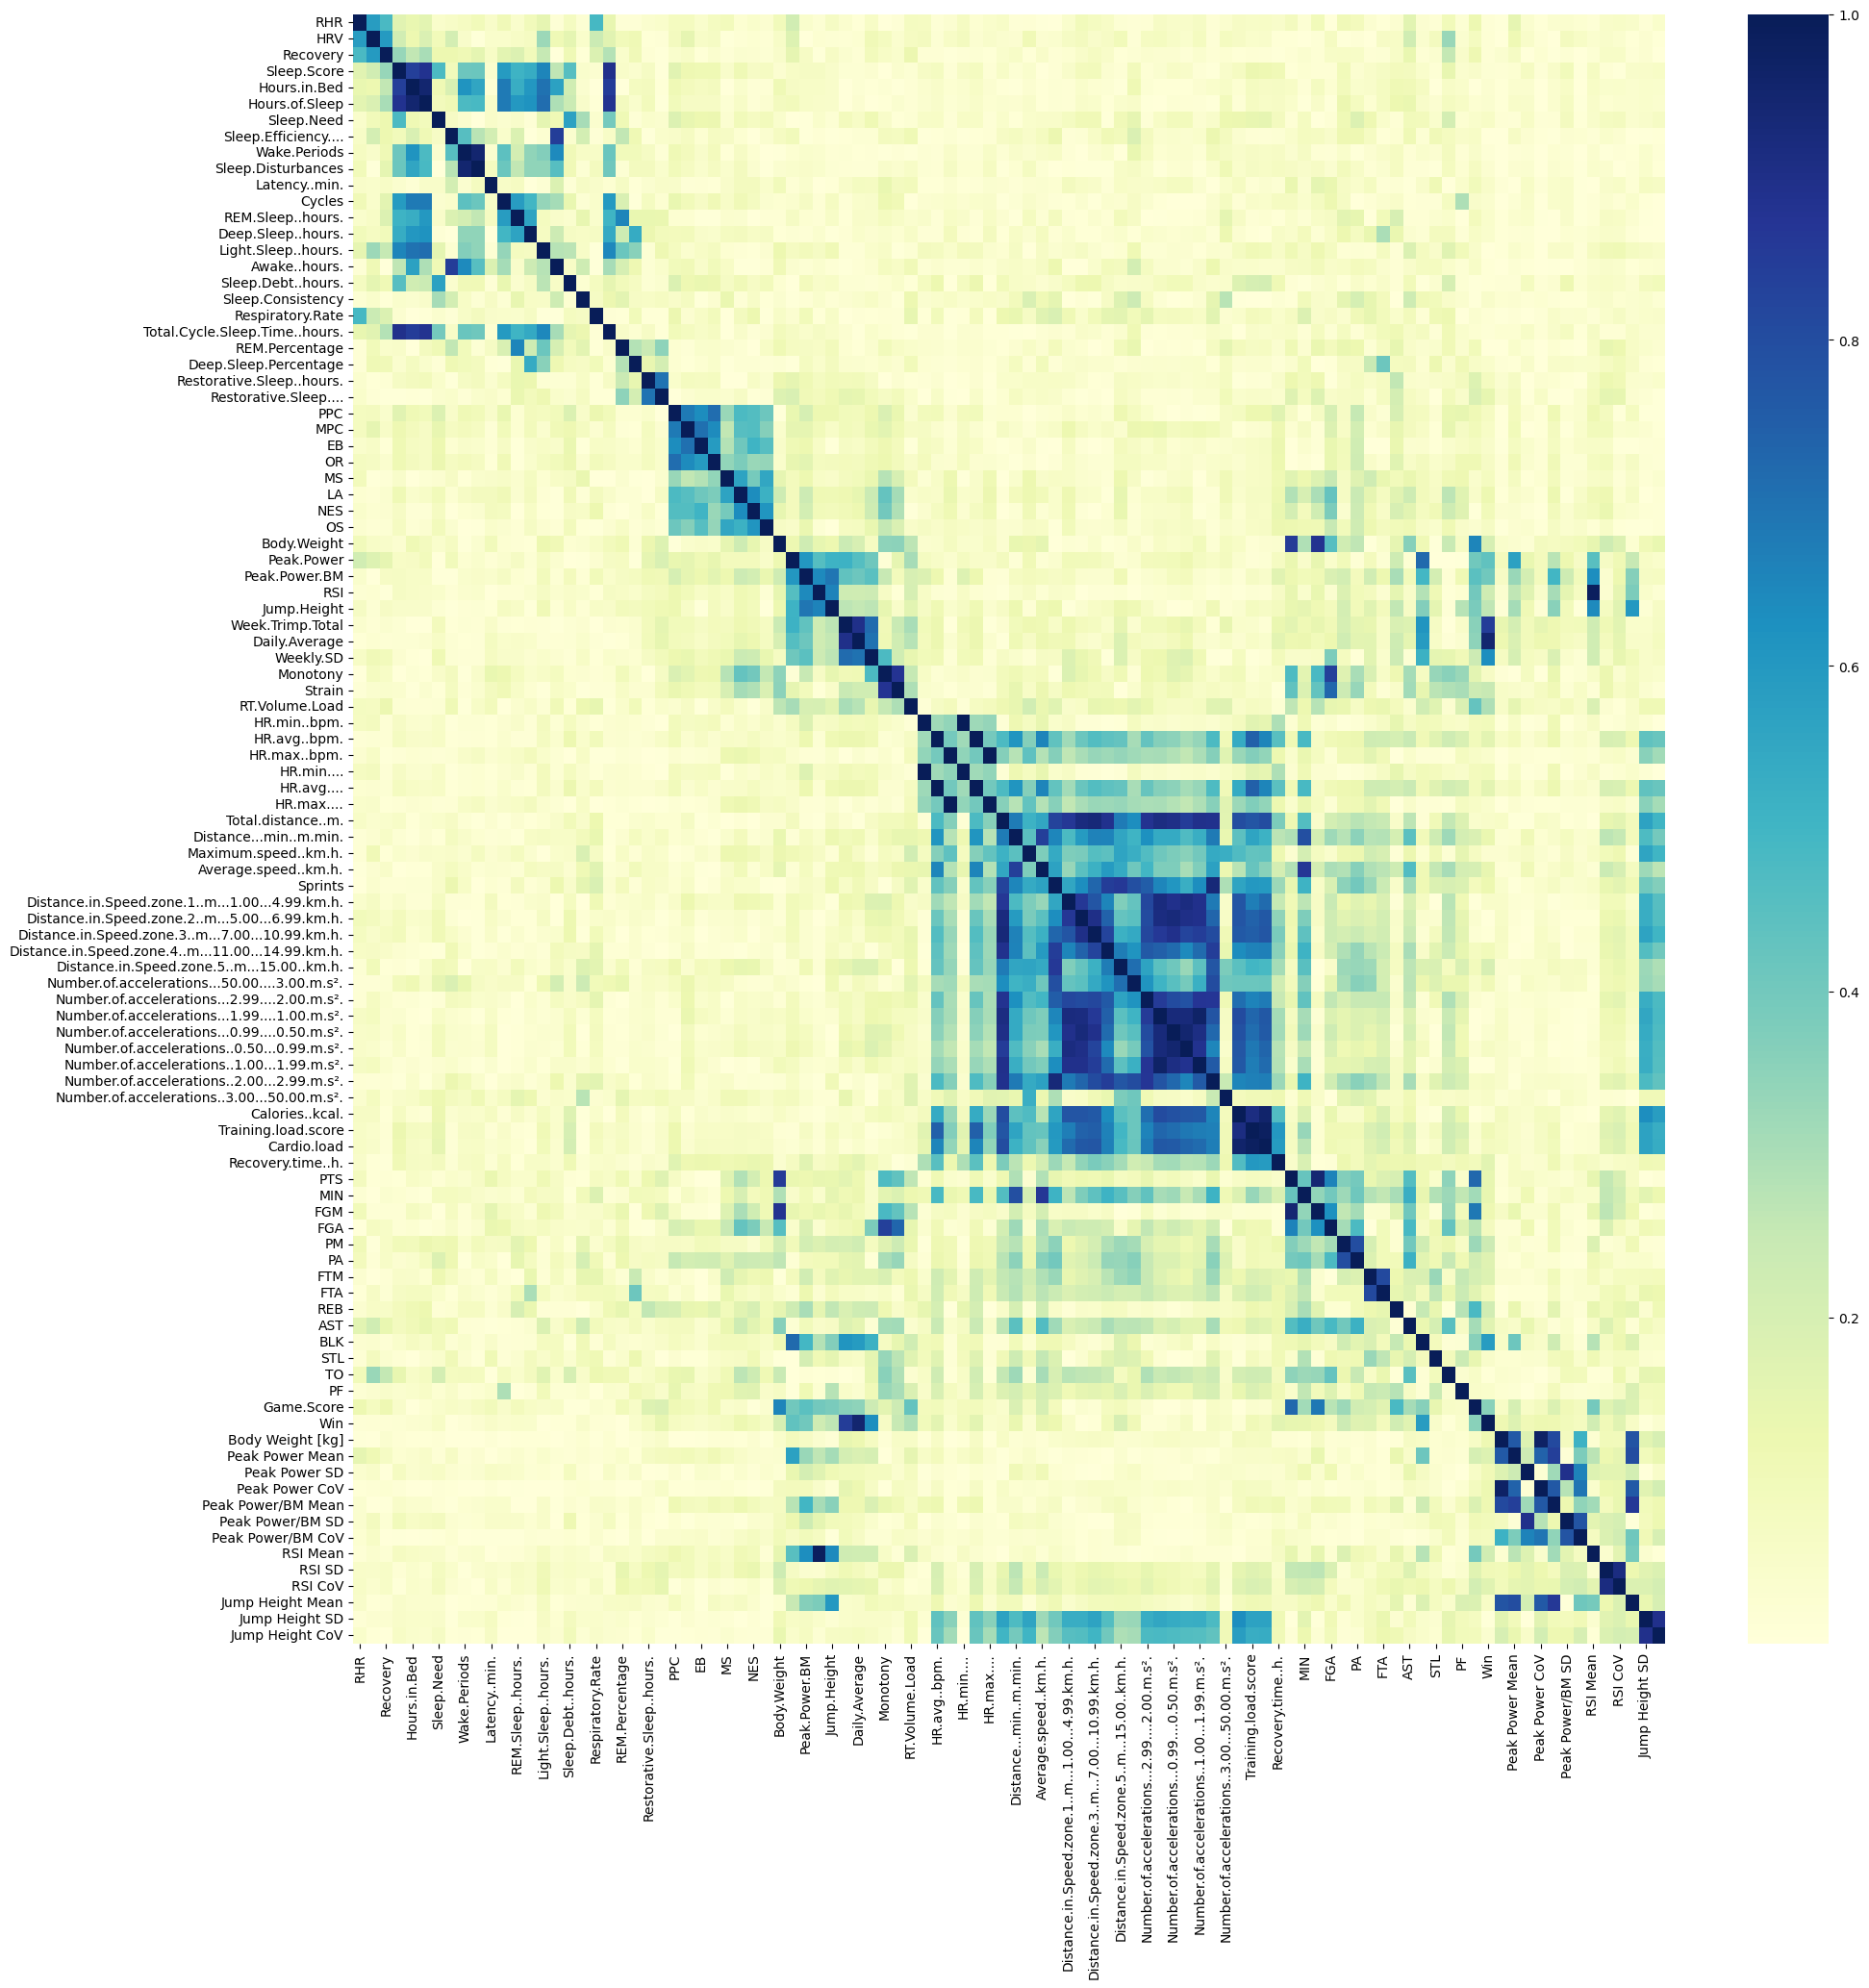

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
fig = plt.figure(figsize=(22,22))

# plotting correlation heatmap
dataplot = sb.heatmap(data.corr().abs(), cmap="YlGnBu", annot=False)

# displaying heatmap
mp.show()

In [ ]:
!pip install collinearity
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_regression
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
selector = SelectNonCollinear(0.6,scoring=f_regression)
X = data
y = data['RSI']
features = data.columns
X = X.to_numpy()
y = y.to_numpy()

  Preparing metadata (setup.py) ... done
  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4443 sha256=6b7d51cd61aa1b6660b74061a7ed85730f412e3dada00f870a08a5a744d18532
  Stored in directory: /root/.cache/pip/wheels/0e/b1/ea/957b5269b023343361d1f3182a3bd03f8a6fbc86ce713ce7cb
Successfully built collinearity


In [ ]:
vals = np.quantile(data['RSI'], [0,0.25,0.5,0.75,1])

In [ ]:
vals

array([0.2 , 0.36, 0.36, 0.36, 0.67])

In [ ]:
!pip install smogn
!pip install deepforest
!pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 668.8/731.7 MB 3.3 MB/s eta 0:00:19
ERROR: Operation cancelled by user


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor , StackingRegressor ,HistGradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
def calculate_rsi_level(value):
    if 0.2 <= value < 0.36:
        return 0
    elif 0.36 <= value < 0.37:
        return 1
    elif 0.37 <= value < 0.373:
        return 2
    elif 0.373 <= value <= 0.67:
        return 3
    else:
        return -1  # Handle the case where the value is outside the specified ranges

# Example usage with the provided array
values = [0.2, 0.36, 0.37, 0.373, 0.67]

for val in values:
    rsi_level = calculate_rsi_level(val)
    print(f"For value {val}, RSI_level is {rsi_level}")

For value 0.2, RSI_level is 0
For value 0.36, RSI_level is 1
For value 0.37, RSI_level is 2
For value 0.373, RSI_level is 3
For value 0.67, RSI_level is 3


In [ ]:
l=[]
for i in range(len(data['RSI'])):
  x = calculate_rsi_level(data['RSI'][i])
  l.append(x)
data['RSI_Level']=l


In [ ]:
XClassify = data.drop(["RSI_Level","RSI","Jump.Height","Peak.Power.BM","Peak.Power","Body.Weight"],axis=1).to_numpy()
yClassify = data["RSI_Level"].to_numpy()
XClassify.shape

(3111, 95)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
XClassifySM, yClassifySM = oversample.fit_resample(XClassify, yClassify)
XClassifySM.shape

(8784, 95)

In [ ]:
smoteX = pd.DataFrame(XClassifySM)
smoteY=pd.DataFrame(yClassifySM)
smote=pd.concat([smoteX,smoteY],axis=1)

In [ ]:
from imblearn.combine import SMOTETomek,SMOTEENN
tomek= SMOTETomek()
XClassify_tomek, yClassify_tomek = tomek.fit_resample(XClassify, yClassify)
XClassify_tomek.shape

(8680, 95)

In [ ]:
tomekX = pd.DataFrame(XClassify_tomek)
tomekY=pd.DataFrame(yClassify_tomek)
tomek=pd.concat([tomekX,tomekY],axis=1)

In [ ]:
enn= SMOTEENN()
XClassify_enn, yClassify_enn = enn.fit_resample(XClassify, yClassify)
XClassify_enn.shape

(6799, 95)

In [ ]:
ennX = pd.DataFrame(XClassify_enn)
ennY=pd.DataFrame(yClassify_enn)
enn=pd.concat([ennX,ennY],axis=1)
enn.to_csv("enn.csv")

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
XClassify_border, yClassify_border = BorderlineSMOTE().fit_resample(XClassify, yClassify)
XClassify_border.shape

(8784, 95)

In [ ]:
borX = pd.DataFrame(XClassify_border)
borY=pd.DataFrame(yClassify_border)
bor=pd.concat([borX,borY],axis=1)

Feature: 0, Score: 0.00326
Feature: 1, Score: 0.01122
Feature: 2, Score: 0.04531
Feature: 3, Score: 0.00329
Feature: 4, Score: 0.00394
Feature: 5, Score: 0.00400
Feature: 6, Score: 0.00613
Feature: 7, Score: 0.00255
Feature: 8, Score: 0.00495
Feature: 9, Score: 0.00510
Feature: 10, Score: 0.00341
Feature: 11, Score: 0.00048
Feature: 12, Score: 0.00317
Feature: 13, Score: 0.00254
Feature: 14, Score: 0.00862
Feature: 15, Score: 0.00390
Feature: 16, Score: 0.00408
Feature: 17, Score: 0.00345
Feature: 18, Score: 0.00340
Feature: 19, Score: 0.00656
Feature: 20, Score: 0.00166
Feature: 21, Score: 0.01023
Feature: 22, Score: 0.00528
Feature: 23, Score: 0.00305
Feature: 24, Score: 0.01053
Feature: 25, Score: 0.00695
Feature: 26, Score: 0.00883
Feature: 27, Score: 0.00648
Feature: 28, Score: 0.00745
Feature: 29, Score: 0.00444
Feature: 30, Score: 0.00645
Feature: 31, Score: 0.01154
Feature: 32, Score: 0.01896
Feature: 33, Score: 0.02795
Feature: 34, Score: 0.01128
Feature: 35, Score: 0.00294
Fe

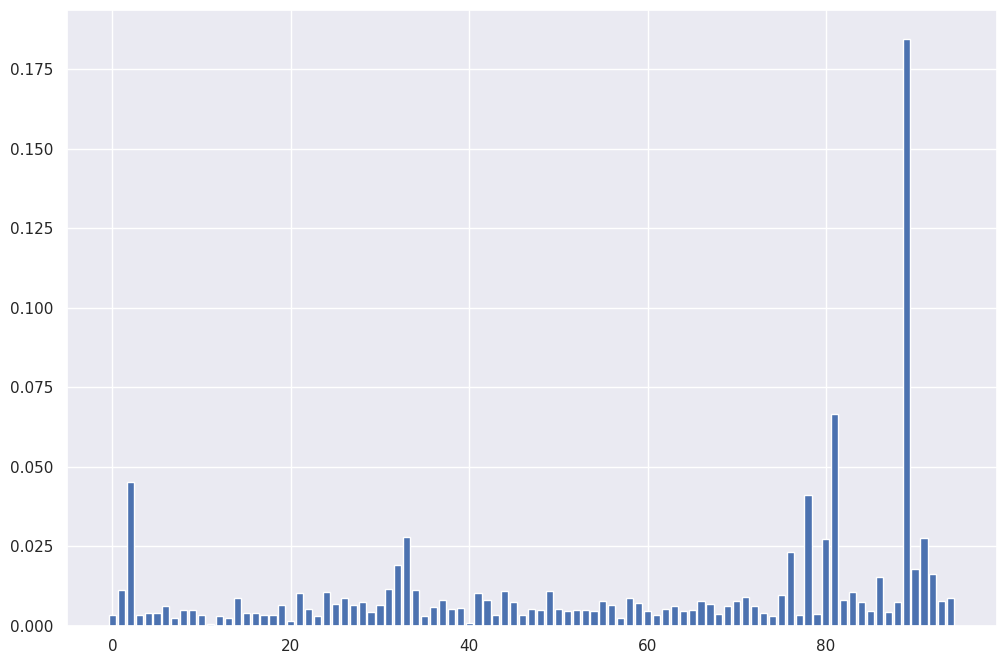

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset

# define the model
model = XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective='reg:squarederror', subsample=0.5, random_state=23)
# fit the model
model.fit(XClassify, yClassify)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Top 20 Feature Importance:
Feature: 89, Score: 0.00256
Feature: 81, Score: 0.00339
Feature: 2, Score: 0.04531
Feature: 78, Score: 0.00341
Feature: 33, Score: 0.00766
Feature: 91, Score: 0.00254
Feature: 80, Score: 0.00340
Feature: 76, Score: 0.00348
Feature: 32, Score: 0.00773
Feature: 90, Score: 0.00255
Feature: 92, Score: 0.00166
Feature: 86, Score: 0.00317
Feature: 31, Score: 0.00777
Feature: 34, Score: 0.00759
Feature: 1, Score: 0.06641
Feature: 49, Score: 0.00589
Feature: 44, Score: 0.00645
Feature: 83, Score: 0.00329
Feature: 24, Score: 0.00870
Feature: 41, Score: 0.00656


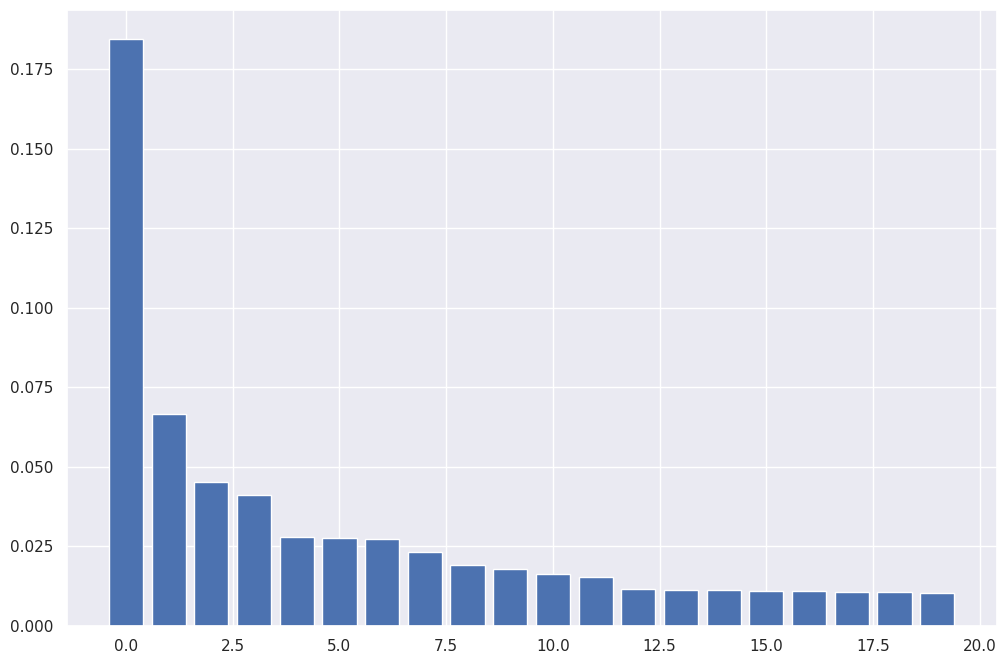

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from matplotlib import pyplot

# Define dataset and other necessary variables (XClassify, yClassify)

# Define the model
model = XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective='reg:squarederror', subsample=0.5, random_state=23)

# Fit the model
model.fit(XClassify, yClassify)

# Get importance
importance = model.feature_importances_

# Sort feature importance values in descending order
sorted_indices = importance.argsort()[::-1]
importance.sort()
importance = importance[::-1]
# Print the top 20 feature importance values
print("Top 20 Feature Importance:")
for i in range(20):
    print(f"Feature: {sorted_indices[i]}, Score: {importance[sorted_indices[i]]:.5f}")

# Plot feature importance
pyplot.bar([x for x in range(20)], importance[:20])
pyplot.show()


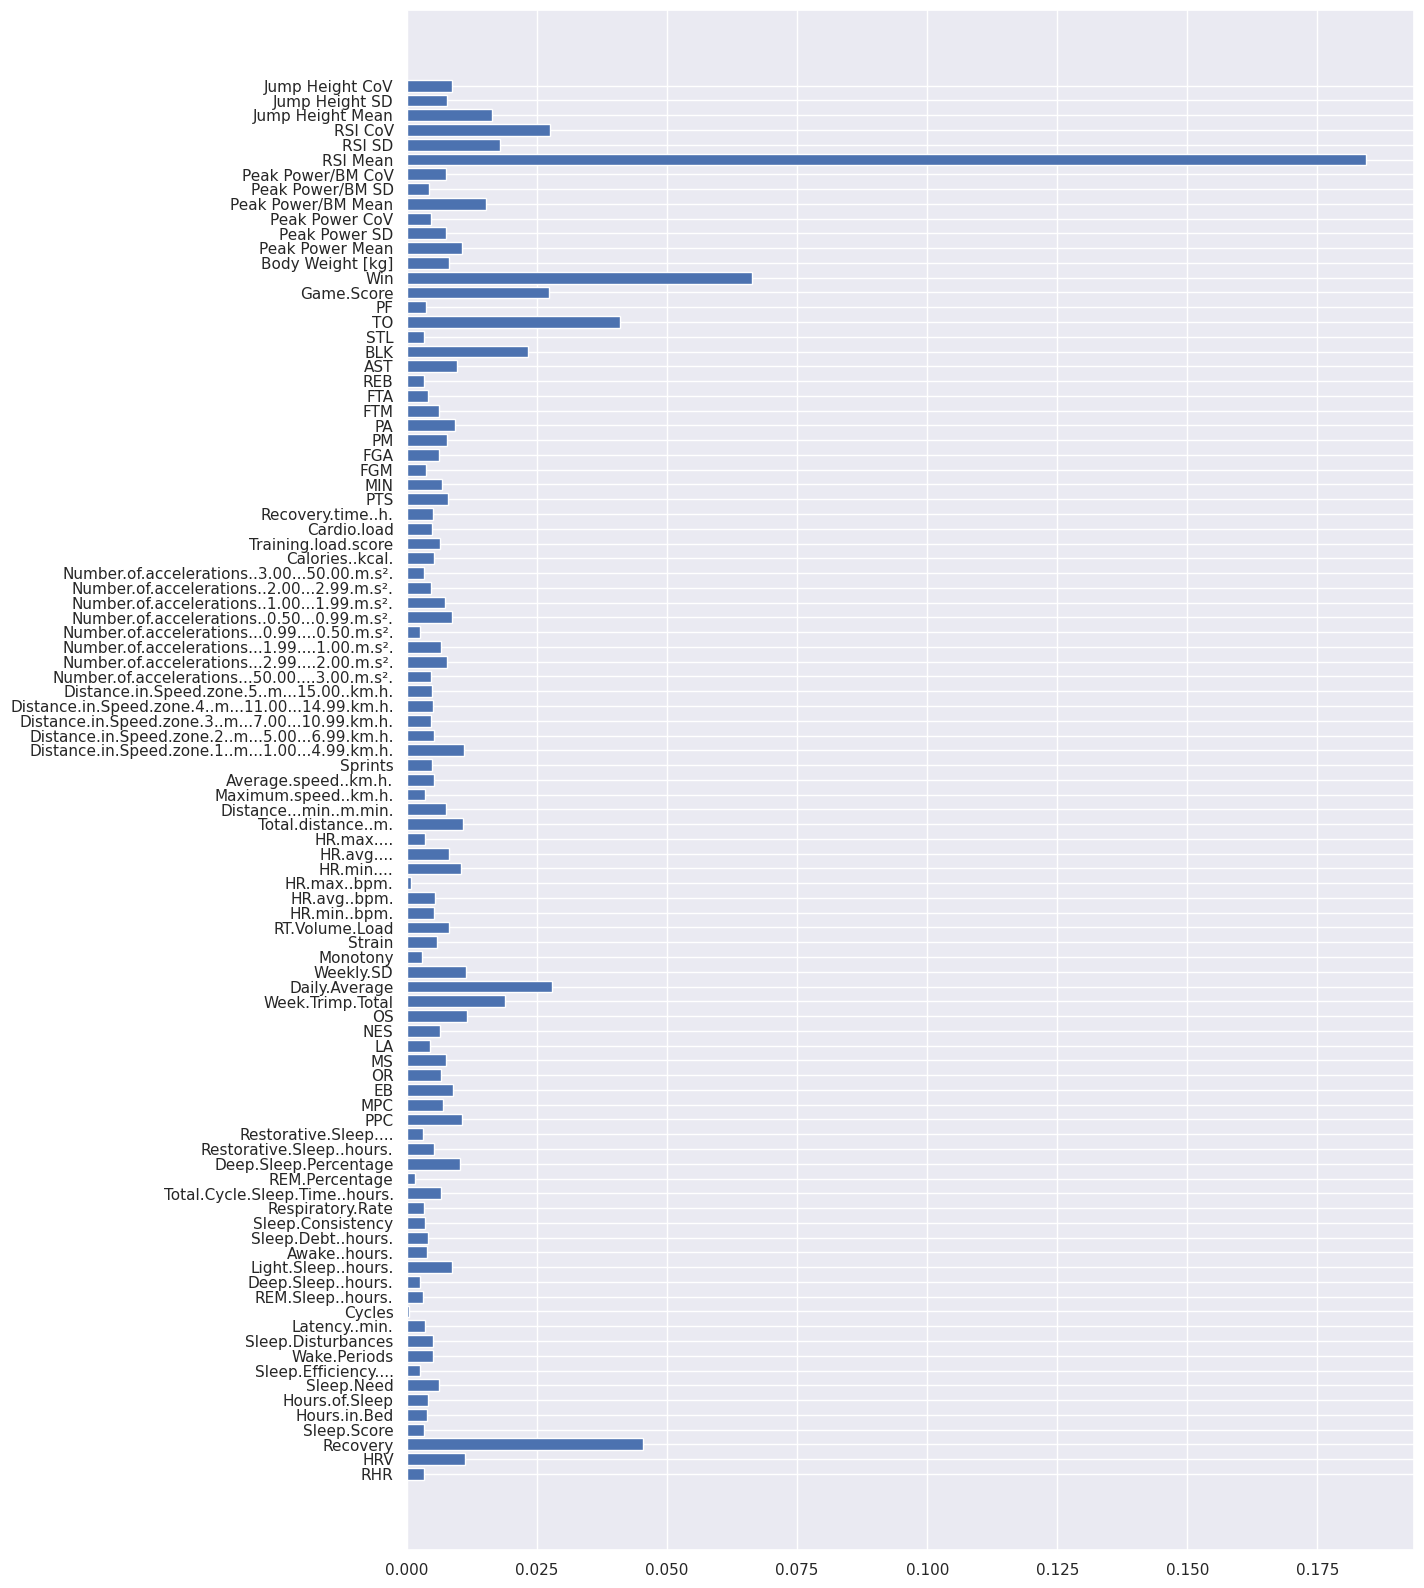

In [ ]:
import pandas as pd
col = data.columns
col = list(col)
col.remove("RSI_Level")
col.remove("RSI")
col.remove("Jump.Height")
col.remove("Peak.Power.BM")
col.remove("Peak.Power")
col.remove("Body.Weight")
pyplot.figure(figsize=(13, 20))

pyplot.barh(col, model.feature_importances_)
pyplot.show()

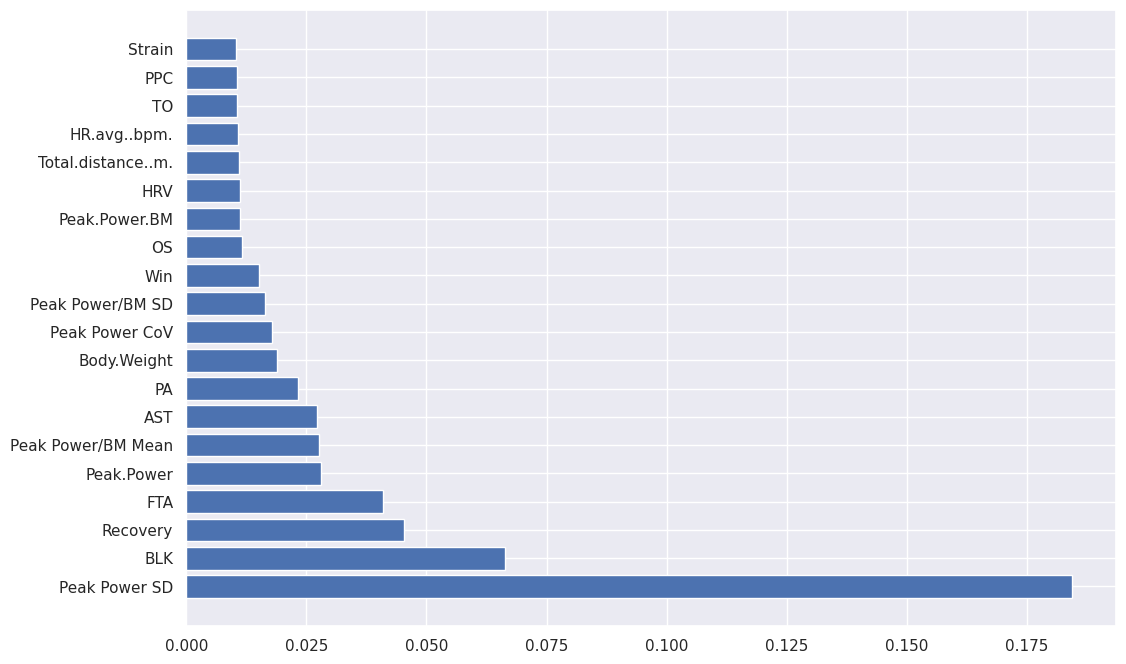

In [ ]:
col = data.columns
pyplot.barh([col[x] for x in sorted_indices[:20]], importance[:20])
pyplot.show()

In [ ]:
xgb = pd.DataFrame(model.feature_importances_)

In [ ]:
xgb.to_csv("class_xgb.csv")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:06:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Feature: 0, Score: 0.00618
Feature: 1, Score: 0.01100
Feature: 2, Score: 0.02392
Feature: 3, Score: 0.00559
Feature: 4, Score: 0.00402
Feature: 5, Score: 0.00537
Feature: 6, Score: 0.00343
Feature: 7, Score: 0.00406
Feature: 8, Score: 0.00769
Feature: 9, Score: 0.00449
Feature: 10, Score: 0.00645
Feature: 11, Score: 0.00439
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00476
Feature: 14, Score: 0.00480
Feature: 15, Score: 0.00940
Feature: 16, Score: 0.00560
Feature: 17, Score: 0.00387
Feature: 18, Score: 0.00457
Feature: 19, Score: 0.00558
Feature: 20, Score: 0.00637
Feature: 21, Score: 0.00648
Feature: 22, Score: 0.00461
Feature: 23, Score: 0.00650
Feature: 24, Score: 0.00529
Feature: 25, Score: 0.01919
Feature: 26, Score: 0.00894
Feature: 27, Score: 0.00276
Feature: 28, Score: 0.00335
Feature: 29, Score: 0.00885
Feature: 30, Score: 0.00846
Feature: 31, Score: 0.01448
Feature: 32, Score: 0.01739
Feature: 33, Score: 0.01467
Feature: 34, Score: 0.00900
Feature: 35, Score: 0.00680
Fe

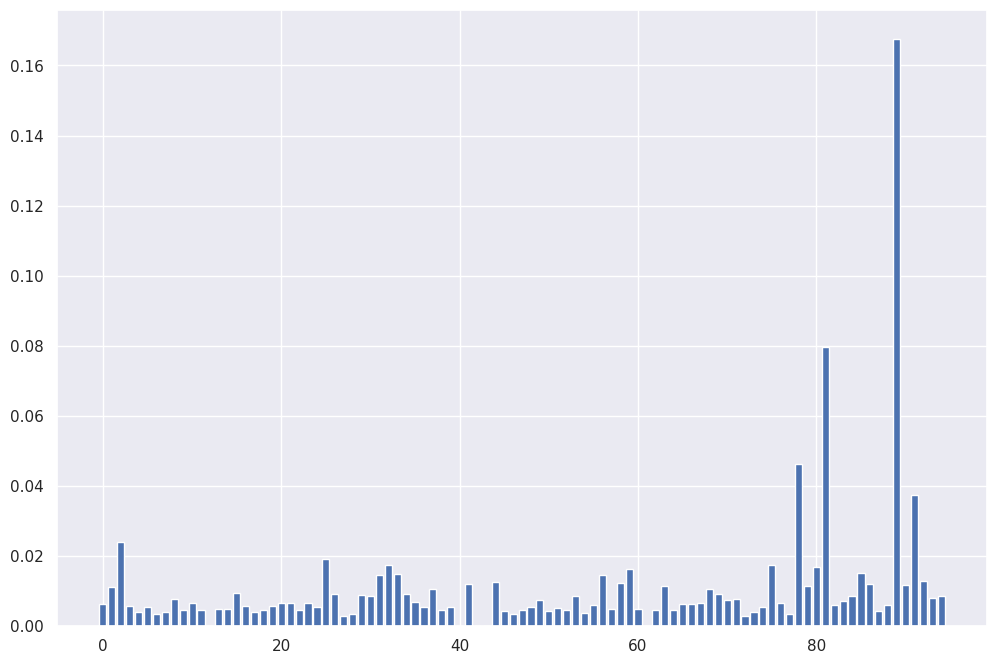

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Correct import statement for XGBoost
from matplotlib import pyplot

# Assuming you have a dataset
# Define your dataset: XClassify, yClassify

# Define the XGBoost model
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                      colsample_bynode=1, colsample_bytree=0.6, gamma=1,
                      learning_rate=0.1, max_delta_step=0, max_depth=5,
                      min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                      nthread=4, num_class=2, objective='multi:softprob',
                      random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                      seed=42, silent=None, subsample=1.0, verbosity=1)

# Fit the model to the training data
model.fit(XClassify, yClassify)

# Get importance
importance = model.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

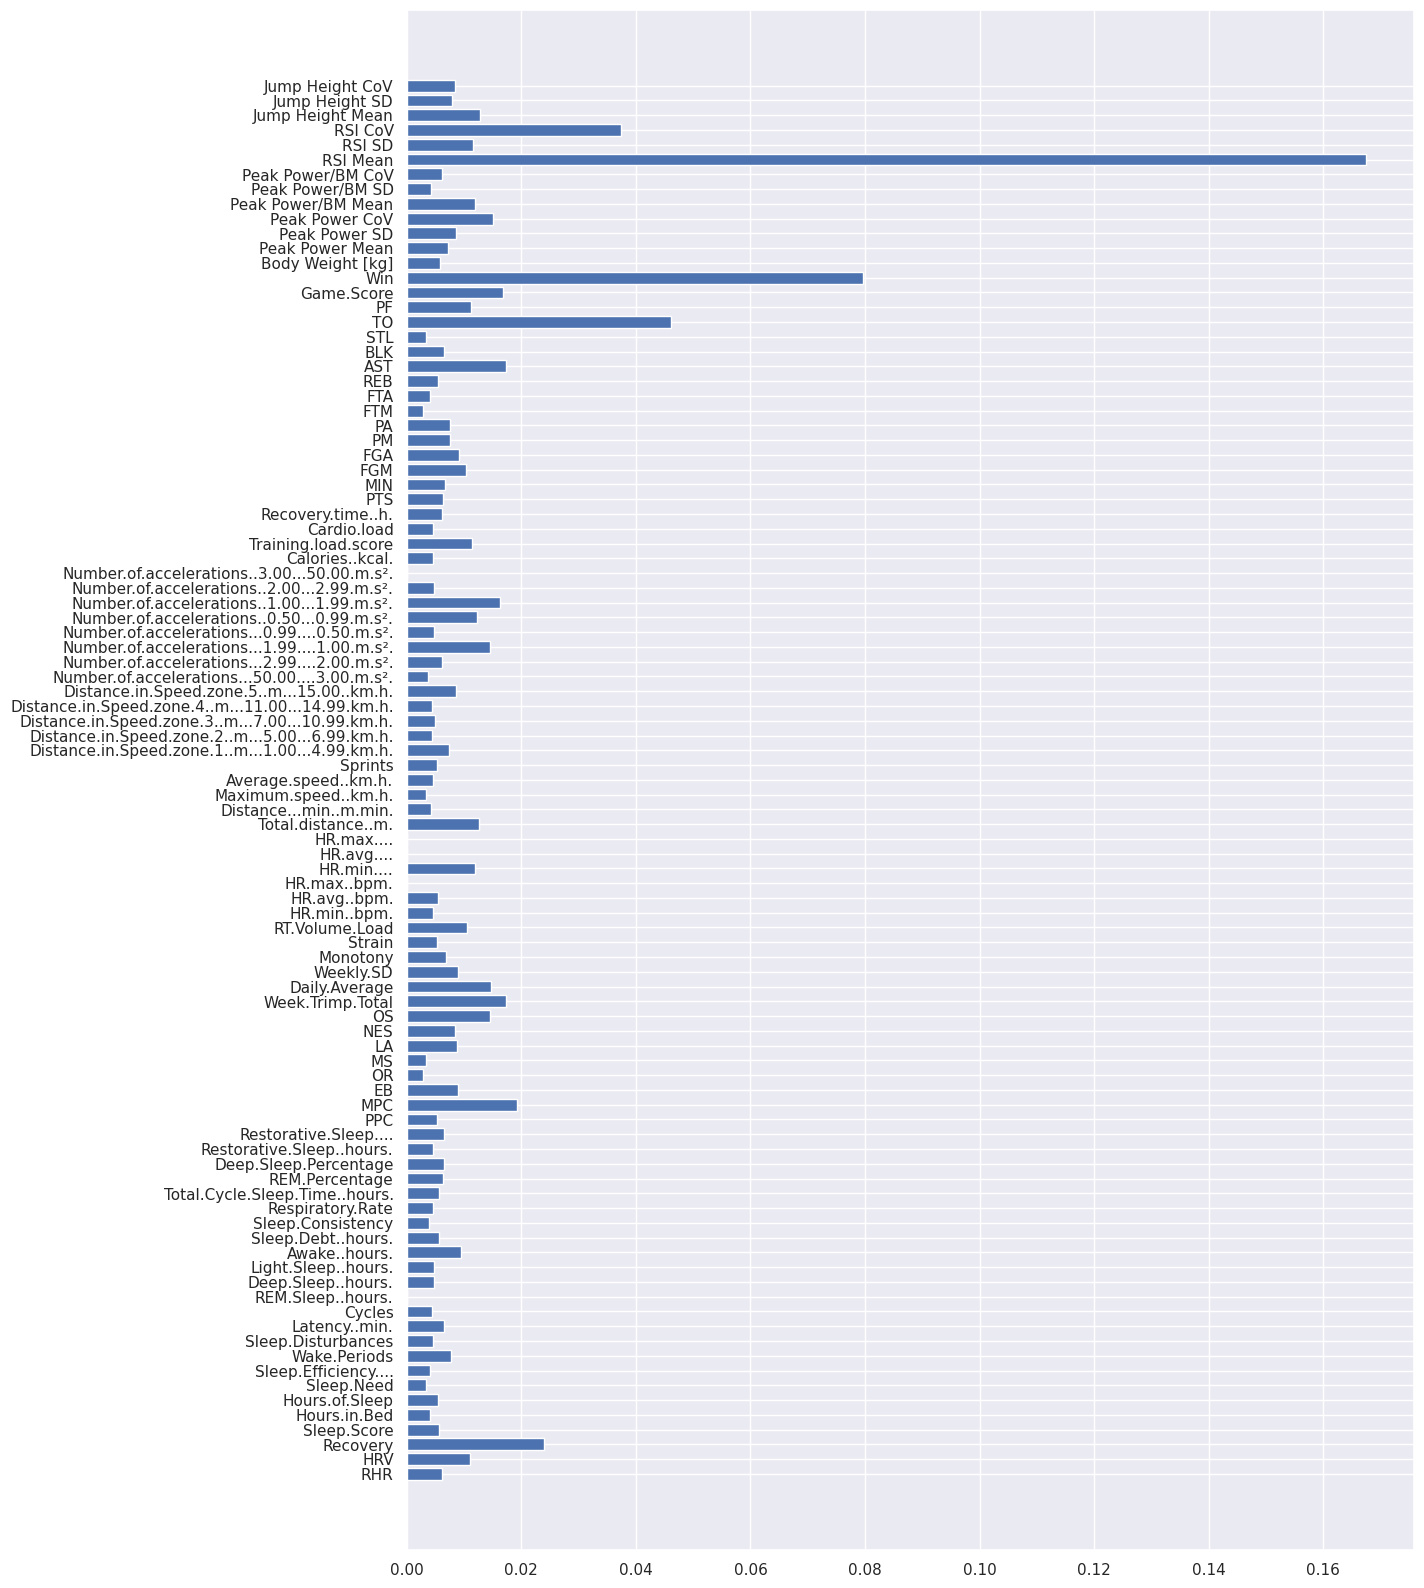

In [ ]:
col = data.columns
col = list(col)
col.remove("RSI_Level")
col.remove("RSI")
col.remove("Jump.Height")
col.remove("Peak.Power.BM")
col.remove("Peak.Power")
col.remove("Body.Weight")
pyplot.figure(figsize=(13, 20))

pyplot.barh(col, model.feature_importances_)
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot

# Assuming you have a dataset
# Define your dataset: XClassify, yClassify

# Define the XGBoost model
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                      colsample_bynode=1, colsample_bytree=0.6, gamma=1,
                      learning_rate=0.1, max_delta_step=0, max_depth=5,
                      min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                      nthread=4, num_class=2, objective='multi:softprob',
                      random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                      seed=42, silent=None, subsample=1.0, verbosity=1)

# Fit the model to the training data
model.fit(XClassify, yClassify)

# Get importance
importance = model.feature_importances_

# Plot feature importance for the first 40 features
pyplot.figure(figsize=(10, 6))
pyplot.bar(range(40), importance[:40], tick_label=range(1, 41))
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance (Top 40 Features)')
pyplot.show()


In [ ]:
rf = pd.DataFrame(model.feature_importances_)

In [ ]:
rf.to_csv("class_rf.csv")

In [ ]:
X = data.drop(["RSI_Level","RSI","Peak.Power","Peak.Power.BM","Jump.Height","Body.Weight"],axis=1)
y = data["RSI_Level"]

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.cm import PuOr
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay
est = RandomForestRegressor().fit(X, y)

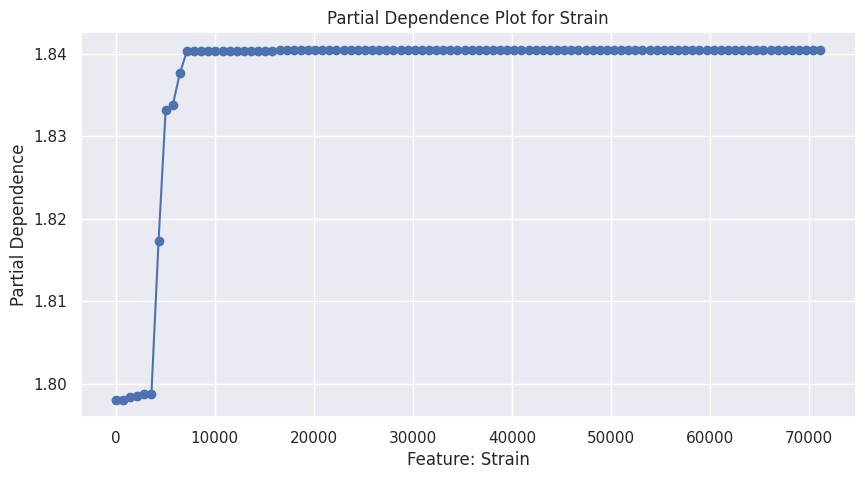

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_friedman1

# Generate sample data
# X, y = make_friedman1()

# Train a RandomForestRegressor
est = RandomForestRegressor().fit(X, y)

# Specify the feature name for partial dependence
feature_name = 'Strain'

# Find the index of the feature in the dataset
feature_index = list(X.columns).index(feature_name) if hasattr(X, 'columns') else None

if feature_index is not None:
    # Specify the range of values for the selected feature
    feature_values = np.linspace(np.min(X.iloc[:, feature_index]), np.max(X.iloc[:, feature_index]), num=100)

    # Initialize an array to store partial dependence values
    pdp_values = np.zeros_like(feature_values)

    # Calculate partial dependence manually
    for i, value in enumerate(feature_values):
        X_temp = X.copy()
        X_temp.iloc[:, feature_index] = value
        pdp_values[i] = np.mean(est.predict(X_temp))

    # Plot the partial dependence
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(feature_values, pdp_values, marker='o', linestyle='-')
    ax.set_xlabel(f"Feature: {feature_name}")
    ax.set_ylabel("Partial Dependence")
    ax.set_title(f"Partial Dependence Plot for {feature_name}")
    plt.show()
else:
    print(f"Feature {feature_name} not found in the dataset.")


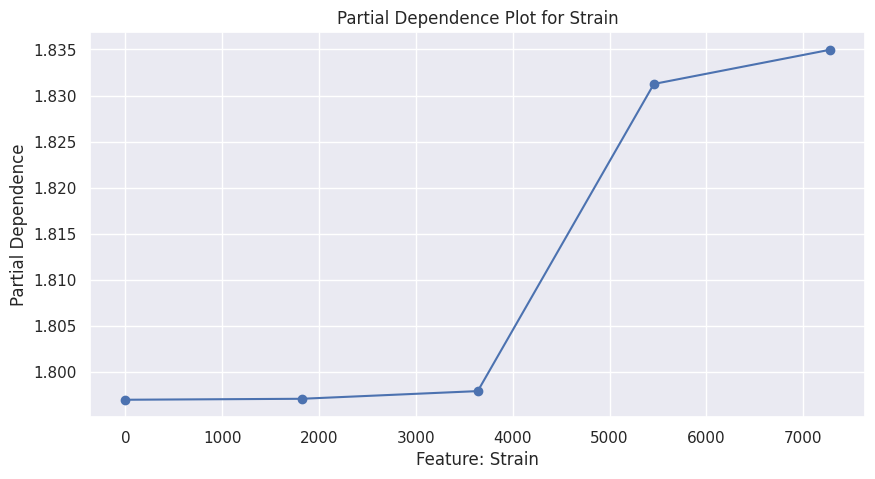

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_friedman1
from sklearn.inspection import partial_dependence

# Generate sample data
# X, y = make_friedman1()

# Train a RandomForestRegressor
est = RandomForestRegressor().fit(X, y)

# Specify the feature name for partial dependence
feature_name = 'Strain'

# Find the index of the feature in the dataset
feature_index = list(X.columns).index(feature_name) if hasattr(X, 'columns') else None

if feature_index is not None:
    # Compute partial dependence
    pd_results = partial_dependence(est, X, features=[feature_index], kind="average", grid_resolution=5)

    # Extract values needed for plotting
    feature_values = pd_results['values'][0]  # assuming this contains the feature values
    pdp_values = pd_results['average'][0]  # assuming this contains the partial dependence values

    # Plot the partial dependence
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(feature_values, pdp_values, marker='o', linestyle='-')
    ax.set_xlabel(f"Feature: {feature_name}")
    ax.set_ylabel("Partial Dependence")
    ax.set_title(f"Partial Dependence Plot for {feature_name}")
    plt.show()
else:
    print(f"Feature {feature_name} not found in the dataset.")


In [ ]:
print(np.unique(data['Strain']))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
print(data['Strain'])
fig = plt.figure(figsize=(100, 50))
plot_partial_dependence(est, X, ['Strain'])
plt.rcParams.update({'font.size': 20})
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error ,f1_score ,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from statistics import mean, stdev
skf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

In [ ]:
target_names = ['0', '1', '2','3']

In [ ]:
def classifierModelEvalution(x_record,y_record,method=""):
  accuracies = []
  f1_result_score = []
  class_accuracy = []
  for train_index, test_index in skf.split(x_record, y_record):
    x_train_fold, x_test_fold = x_record[train_index], x_record[test_index]
    y_train_fold, y_test_fold = y_record[train_index], y_record[test_index]
    clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, num_class=2, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=None, subsample=1.0, verbosity=1).fit(x_train_fold, y_train_fold)
    #print("="*80)
    #print("Result for ",algorithm)
    #print(algorithm,"Score is : ",clf.score(x_test_fold, y_test_fold))

    yClassify_pred_value = clf.predict(x_test_fold)

    #print(algorithm,"Confustion Matrix : ", confusion_matrix(y_test_fold, yClassify_pred_value))
    cm = confusion_matrix(y_test_fold, yClassify_pred_value)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_accuracy.append(  cm.diagonal().tolist())
    # evaluate predictions
    accuracy = accuracy_score(y_test_fold, yClassify_pred_value)
    accuracies.append(accuracy)
    f1_result = f1_score(y_test_fold, yClassify_pred_value, average='macro')
    f1_result_score.append(f1_result)
    #print(classification_report(y_test_fold, yClassify_pred_value, target_names=target_names))

  print("="*50)
  print("**********  Result for  ", method, "")
  print('List of possible accuracy:', accuracies)
  print("List of F1 Score",f1_result_score)
  print("Average of F1 Score  ",sum(f1_result_score)/len(f1_result_score))
  print("Class Accuracy" , class_accuracy)
  print('\nMaximum Accuracy That can be obtained from this model is:',
        max(accuracies)*100, '%')
  print('\nMinimum Accuracy:',
        min(accuracies)*100, '%')
  print('\nOverall Accuracy:',
        mean(accuracies)*100, '%')
  print('\nStandard Deviation is:', stdev(accuracies))


In [ ]:
import warnings
def classifierModelEvalution(x_record, y_record, method=""):
    accuracies = []
    f1_result_score = []
    class_accuracy = []
    warnings.filterwarnings("ignore", category=UserWarning, message="Parameters: { \"scale_pos_weight\" } are not used.")
    for train_index, test_index in skf.split(x_record, y_record):
        x_train_fold, x_test_fold = x_record[train_index], x_record[test_index]
        y_train_fold, y_test_fold = y_record[train_index], y_record[test_index]
        clf = xgb.XGBClassifier(
            base_score=0.5, booster='gbtree', colsample_bylevel=1,
            colsample_bynode=1, colsample_bytree=0.6, gamma=1,
            learning_rate=0.1, max_delta_step=0, max_depth=5,
            min_child_weight=1, missing=np.nan,  # Set missing to a numeric value
            n_estimators=100, n_jobs=1, nthread=4, num_class=2,
            objective='multi:softprob', random_state=0, reg_alpha=0,
            reg_lambda=1, scale_pos_weight=1, seed=42, silent=None,
            subsample=1.0, verbosity=1
        ).fit(x_train_fold, y_train_fold)

        yClassify_pred_value = clf.predict(x_test_fold)

        cm = confusion_matrix(y_test_fold, yClassify_pred_value)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        class_accuracy.append(cm.diagonal().tolist())

        accuracy = accuracy_score(y_test_fold, yClassify_pred_value)
        accuracies.append(accuracy)
        f1_result = f1_score(y_test_fold, yClassify_pred_value, average='macro')
        f1_result_score.append(f1_result)
    warnings.resetwarnings()
    print("="*50)
    print("**********  Result for  ", method, "")
    print('List of possible accuracy:', accuracies)
    print("List of F1 Score", f1_result_score)
    print("Average of F1 Score  ", sum(f1_result_score)/len(f1_result_score))
    print("Class Accuracy", class_accuracy)
    print('\nMaximum Accuracy That can be obtained from this model is:',
          max(accuracies)*100, '%')
    print('\nMinimum Accuracy:',
          min(accuracies)*100, '%')
    print('\nOverall Accuracy:',
          mean(accuracies)*100, '%')
    print('\nStandard Deviation is:', stdev(accuracies))

In [ ]:
X = data.drop("RSI_Level",axis=1).to_numpy()
y = data["RSI_Level"].to_numpy()

In [ ]:
x_record_list = [X]
y_record_list = [y]

Algorithms = ["Normal Data"]
for i in range(len(x_record_list)):
  classifierModelEvalution(x_record_list[i],y_record_list[i],Algorithms[i])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:56:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:56:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:56:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:56:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:56:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weigh

**********  Result for   Normal Data 
List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
List of F1 Score [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average of F1 Score   1.0
Class Accuracy [[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], 

In [ ]:
data=pd.read_csv("/content/grouped_hrv_rsi_MEAN_data_mondays_cleaned_Combined.csv")

In [ ]:
# import random
# data = data.sample(frac=1).reset_index(drop=True)
data.describe()

,HRV,RSI Mean
count,171.000000,171.000000
mean,94.557073,0.485497
std,33.947765,1.016864
min,19.000000,0.200000
25%,70.214286,0.330000
50%,86.571429,0.390000
75%,125.214286,0.470000
max,180.000000,13.640000


In [ ]:
print(data)

                Athlete    Date         HRV  RSI Mean
0    Athlete 1 Bergdorf  Monday  120.571429      0.32
1    Athlete 1 Bergdorf  Monday  108.142857      0.26
2    Athlete 1 Bergdorf  Monday  136.285714      0.36
3    Athlete 1 Bergdorf  Monday  128.000000      0.27
4    Athlete 1 Bergdorf  Monday  131.571429      0.29
..                  ...     ...         ...       ...
166     Athlete 7 Klein  Monday  140.000000      0.38
167     Athlete 7 Klein  Monday  119.500000      0.36
168  Athlete 8 Marshall  Monday   57.500000      0.33
169  Athlete 8 Marshall  Monday   69.000000      0.39
170  Athlete 8 Marshall  Monday   78.000000      0.39

[171 rows x 4 columns]


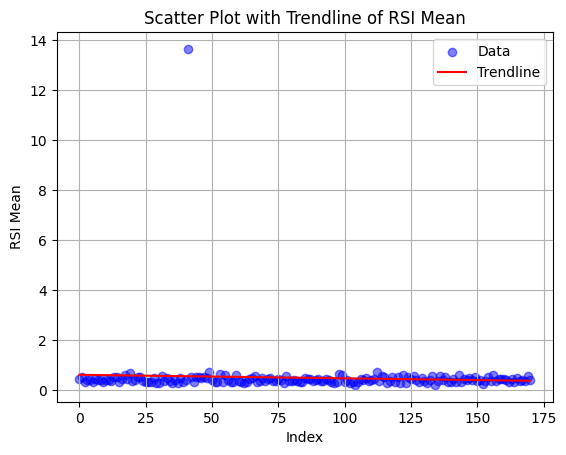

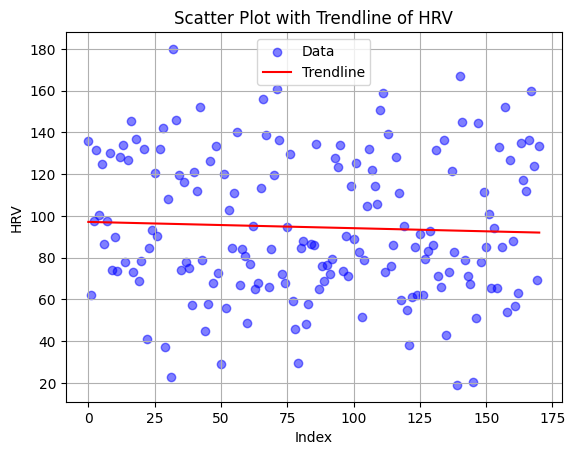

In [ ]:
from sklearn.linear_model import LinearRegression

column_name = 'RSI Mean'
column_data = data[column_name]

plt.scatter(range(len(column_data)), column_data, color='blue', alpha=0.5, label='Data')  # Adjust alpha for transparency

# Performing linear regression to get the trendline
x = np.arange(len(column_data)).reshape(-1, 1)
model = LinearRegression().fit(x, column_data)
y_pred = model.predict(x)

# Plotting trendline
plt.plot(x, y_pred, color='red', label='Trendline')

plt.title('Scatter Plot with Trendline of {}'.format(column_name))
plt.xlabel('Index')
plt.ylabel('{}'.format(column_name))
plt.grid(True)
plt.legend()
plt.show()

column_name = 'HRV'
column_data = data[column_name]

# Plotting scatter plot
plt.scatter(range(len(column_data)), column_data, color='blue', alpha=0.5, label='Data')  # Adjust alpha for transparency

# Performing linear regression to get the trendline
x = np.arange(len(column_data)).reshape(-1, 1)
model = LinearRegression().fit(x, column_data)
y_pred = model.predict(x)

# Plotting trendline
plt.plot(x, y_pred, color='red', label='Trendline')

plt.title('Scatter Plot with Trendline of {}'.format(column_name))
plt.xlabel('Index')
plt.ylabel('{}'.format(column_name))
plt.grid(True)
plt.legend()
plt.show()

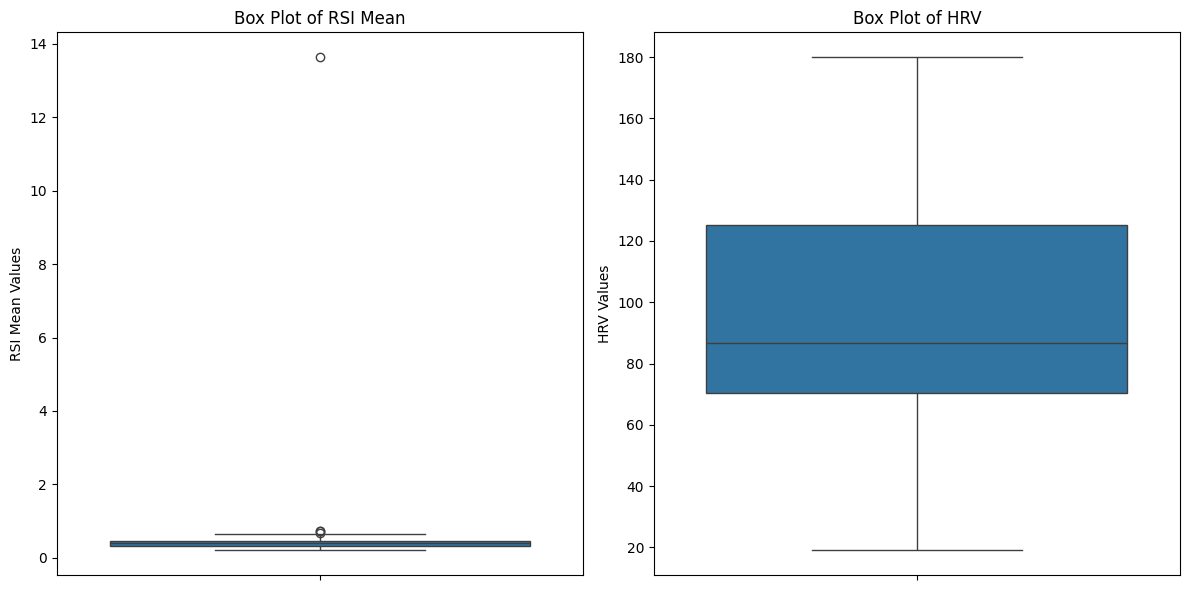

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis object using matplotlib
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create individual box plots for 'RSI Mean' and 'HRV'
sns.boxplot(data=data['RSI Mean'], ax=axes[0])
axes[0].set_title('Box Plot of RSI Mean')
axes[0].set_ylabel('RSI Mean Values')

sns.boxplot(data=data['HRV'], ax=axes[1])
axes[1].set_title('Box Plot of HRV')
axes[1].set_ylabel('HRV Values')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
print(data.shape)
data = data[data['RSI Mean']<=2]
print(data.shape)


(171, 4)
(170, 4)


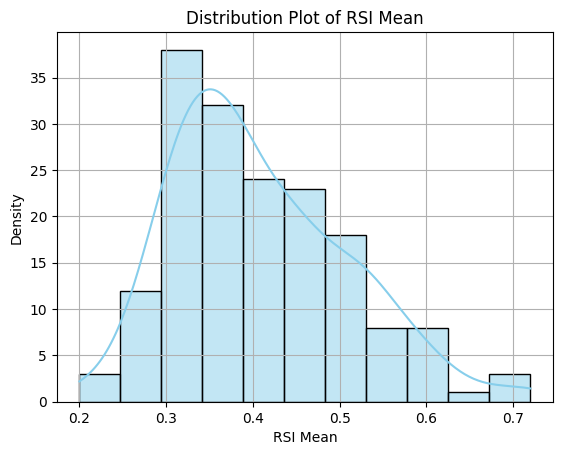

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution plot
sns.histplot(data['RSI Mean'], kde=True, color='skyblue')
plt.title('Distribution Plot of RSI Mean')
plt.xlabel('RSI Mean')
plt.ylabel('Density')
plt.grid(True)
plt.show()


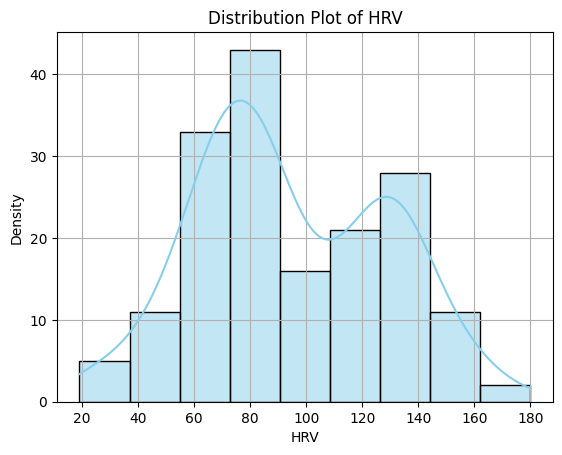

In [ ]:
column_name='HRV'
column_data = data[column_name]
sns.histplot(column_data, kde=True, color='skyblue')
plt.title('Distribution Plot of {}'.format(column_name))
plt.xlabel('{}'.format(column_name))
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
averaged_data = data.groupby('Athlete').agg({'RSI Mean': 'mean', 'HRV': 'mean'}).reset_index()

In [ ]:
print(averaged_data)

                     Athlete  RSI Mean         HRV
0         Athlete 1 Bergdorf  0.293333  127.158730
1          Athlete 10 McCray  0.450000  127.000000
2    Athlete 11 Owusu-Mensah  0.363333  104.000000
3          Athlete 12 Porter  0.304286   80.969388
4           Athlete 13 Smith  0.460000   49.571429
5        Athlete 14 Stroemel  0.341429   84.103741
6          Athlete 15 Tucker  0.448400  134.649524
7            Athlete 16 Wood  0.410000   78.168254
8   Athlete 17 Laeticia Ziba  0.538462   63.461538
9          Athlete 18 Branon  0.440000   20.250000
10          Athlete 19 Pryor  0.666000   70.295238
11    Athlete 21 Amelia Wood  0.547500   76.389881
12  Athlete 22 Siera Johnson  0.515000  123.428571
13         Athlete 3 Hammond  0.346667   66.619048
14          Athlete 4 Hallum  0.210000   79.000000
15         Athlete 5 Jackson  0.963913  104.993789
16         Athlete 6 Johnson  0.374000   31.285714
17           Athlete 7 Klein  0.369231  136.647253
18        Athlete 8 Marshall  0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

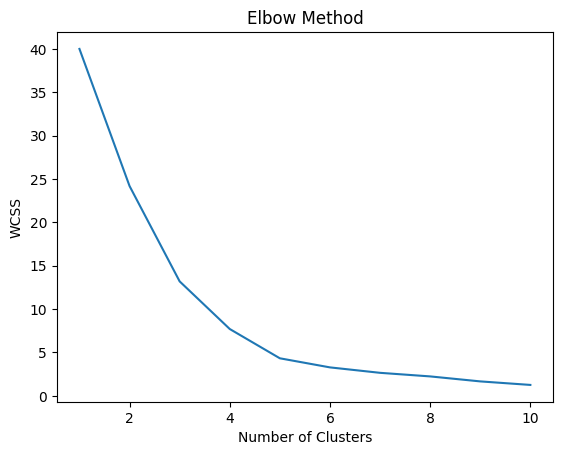

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


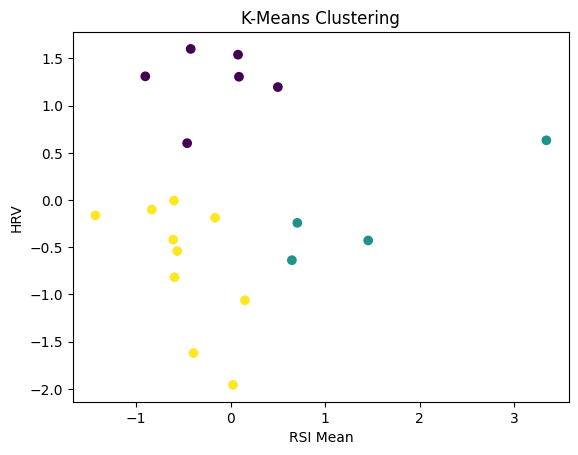

Cluster Means:
         RSI Mean         HRV
Cluster                      
0        0.406550  125.480680
1        0.678969   78.785112
2        0.356860   61.810249


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is a list of features you want to use for clustering
# Replace 'features' with the actual features you want to use
features = ['RSI Mean', 'HRV']  # Example features

# Extract the feature columns from the dataset
X = averaged_data[features]

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the elbow plot
n_clusters = 3  # Adjust this based on the elbow plot

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
averaged_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (for 2D data)
# Assuming you have two features 'Feature1' and 'Feature2'
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=averaged_data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('RSI Mean')
plt.ylabel('HRV')
plt.show()

# You can explore the clusters further by analyzing the characteristics of each cluster
# For example, you can calculate cluster means for each feature
cluster_means = averaged_data.groupby('Cluster')[features].mean()
print("Cluster Means:")
print(cluster_means)


Silhouette Score: 0.43625266469807833
Inertia: 13.474859108927676


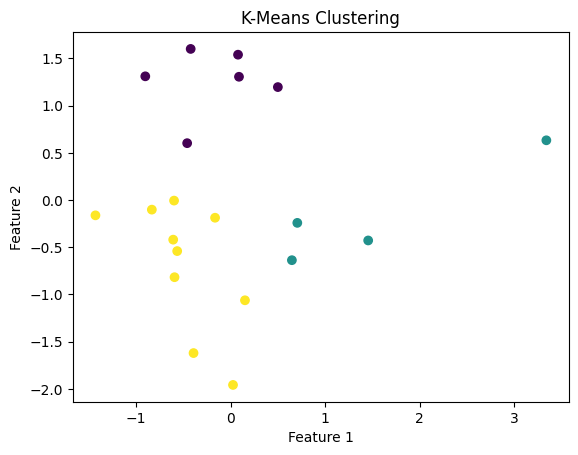

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, averaged_data['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Access inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Visualize the clusters (for 2D data)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=averaged_data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
data=averaged_data

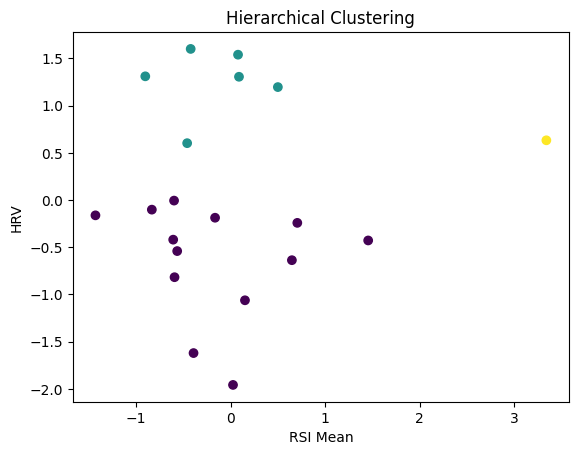

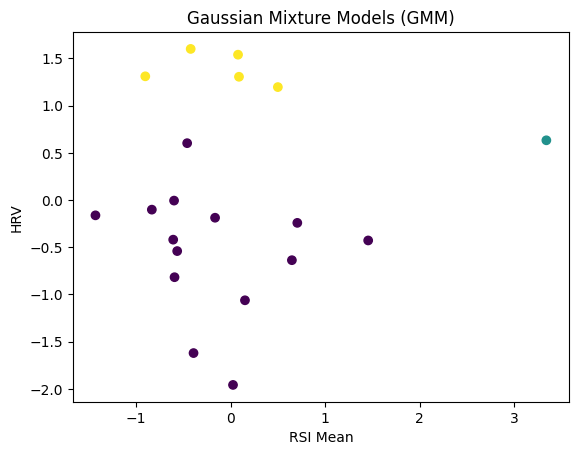

Hierarchical Clustering Cluster Means:
                      RSI Mean         HRV
Hierarchical_Cluster                      
0                     0.409274   63.711473
1                     0.406550  125.480680
2                     0.963913  104.993789

Gaussian Mixture Models (GMM) Cluster Means:
             RSI Mean         HRV
GMM_Cluster                      
0            0.405993   66.589225
1            0.963913  104.993789
2            0.415193  129.776816


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('RSI Mean')
plt.ylabel('HRV')
plt.show()

# Perform Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=3)
data['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['GMM_Cluster'], cmap='viridis')
plt.title('Gaussian Mixture Models (GMM)')
plt.xlabel('RSI Mean')
plt.ylabel('HRV')
plt.show()

# You can explore the clusters further by analyzing the characteristics of each cluster
# For example, you can calculate cluster means for each feature
hierarchical_cluster_means = data.groupby('Hierarchical_Cluster')[features].mean()
print("Hierarchical Clustering Cluster Means:")
print(hierarchical_cluster_means)

gmm_cluster_means = data.groupby('GMM_Cluster')[features].mean()
print("\nGaussian Mixture Models (GMM) Cluster Means:")
print(gmm_cluster_means)


In [ ]:
silhouette_score_hierarchical = silhouette_score(X_scaled, data['Hierarchical_Cluster'])
print("Silhouette Score (Hierarchical Clustering):", silhouette_score_hierarchical)

# Calculate silhouette score for Gaussian Mixture Models (GMM)
silhouette_score_gmm = silhouette_score(X_scaled, data['GMM_Cluster'])
print("Silhouette Score (Gaussian Mixture Models):", silhouette_score_gmm)

Silhouette Score (Hierarchical Clustering): 0.42799812287166894
Silhouette Score (Gaussian Mixture Models): 0.41807141782204377


*Silhouette Score*


| Clustering Algorithm   | Silhouette Score |
|------------------------|------------------|
| Gaussian Mixture Model |     0.418071     |
| Hierarchical           |     0.427998     |
| K Means                |     0.436253     |


In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
df = pd.read_csv('grouped_data_mondays.csv')

# Specify columns for imputation
columns_to_impute = ['RSI Mean', 'HRV', 'RHR', 'Recovery', 'Sleep.Score', 'RT.Volume.Load','MPC','Hours.in.Bed']

# Initialize the IterativeImputer with parameters
imp = IterativeImputer(max_iter=10, random_state=0, estimator=RandomForestRegressor(n_estimators=10, random_state=0))

# Fit the imputer to the specified columns and transform the data
df[columns_to_impute] = imp.fit_transform(df[columns_to_impute])

# Now 'df' contains your DataFrame with missing values imputed for the specified columns

# Write the modified DataFrame back to a CSV file
df.to_csv('grouped_data_mondays_modified.csv', index=False)

print("Missing values in specified columns have been imputed using IterativeImputer.")

Missing values in specified columns have been imputed using IterativeImputer.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
import pandas as pd
df=pd.read_csv("/content/grouped_data_mondays_modified.csv")
# List of features to aggregate
features_to_aggregate = ['RSI Mean', 'HRV', 'RHR', 'Recovery', 'Sleep.Score', 'RT.Volume.Load','MPC','Hours.in.Bed']

# Group by 'Athlete' and calculate the mean for each feature
averaged_data = df.groupby('Athlete')[features_to_aggregate].mean().reset_index()

# Print the first few rows of the aggregated data
print(averaged_data.head())

                   Athlete  RSI Mean         HRV        RHR   Recovery  \
0       Athlete 1 Bergdorf  0.298111  114.205291  49.457672  63.748148   
1        Athlete 10 McCray  0.386556   80.695767  57.091534  69.426984   
2  Athlete 11 Owusu-Mensah  0.371852  100.129630  61.635979  59.840212   
3        Athlete 12 Porter  0.306222   79.089418  54.204762  62.421164   
4         Athlete 13 Smith  0.386296   62.022222  56.978836  71.245503   

   Sleep.Score  RT.Volume.Load       MPC  Hours.in.Bed  
0    80.982011     7076.383704  3.585185      7.902889  
1    75.402116     7817.759259  4.009524      7.746545  
2    75.987302     6335.248519  4.313757      7.477360  
3    85.416931     6104.918148  3.026455      8.913894  
4    62.930159     7902.858519  5.420106      6.895106  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

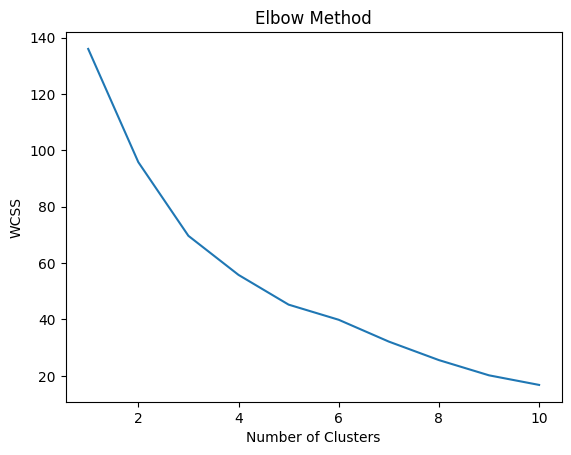

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define the features for clustering
features = ['HRV', 'RHR', 'RSI Mean', 'Recovery', 'Sleep.Score','RT.Volume.Load','MPC','Hours.in.Bed']

# Extract the feature columns from the dataset
X = averaged_data[features]

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares (WCSS) to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the elbow plot
n_clusters = 3  # Adjust this based on the elbow plot

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
averaged_data['Cluster'] = kmeans.fit_predict(X_scaled)

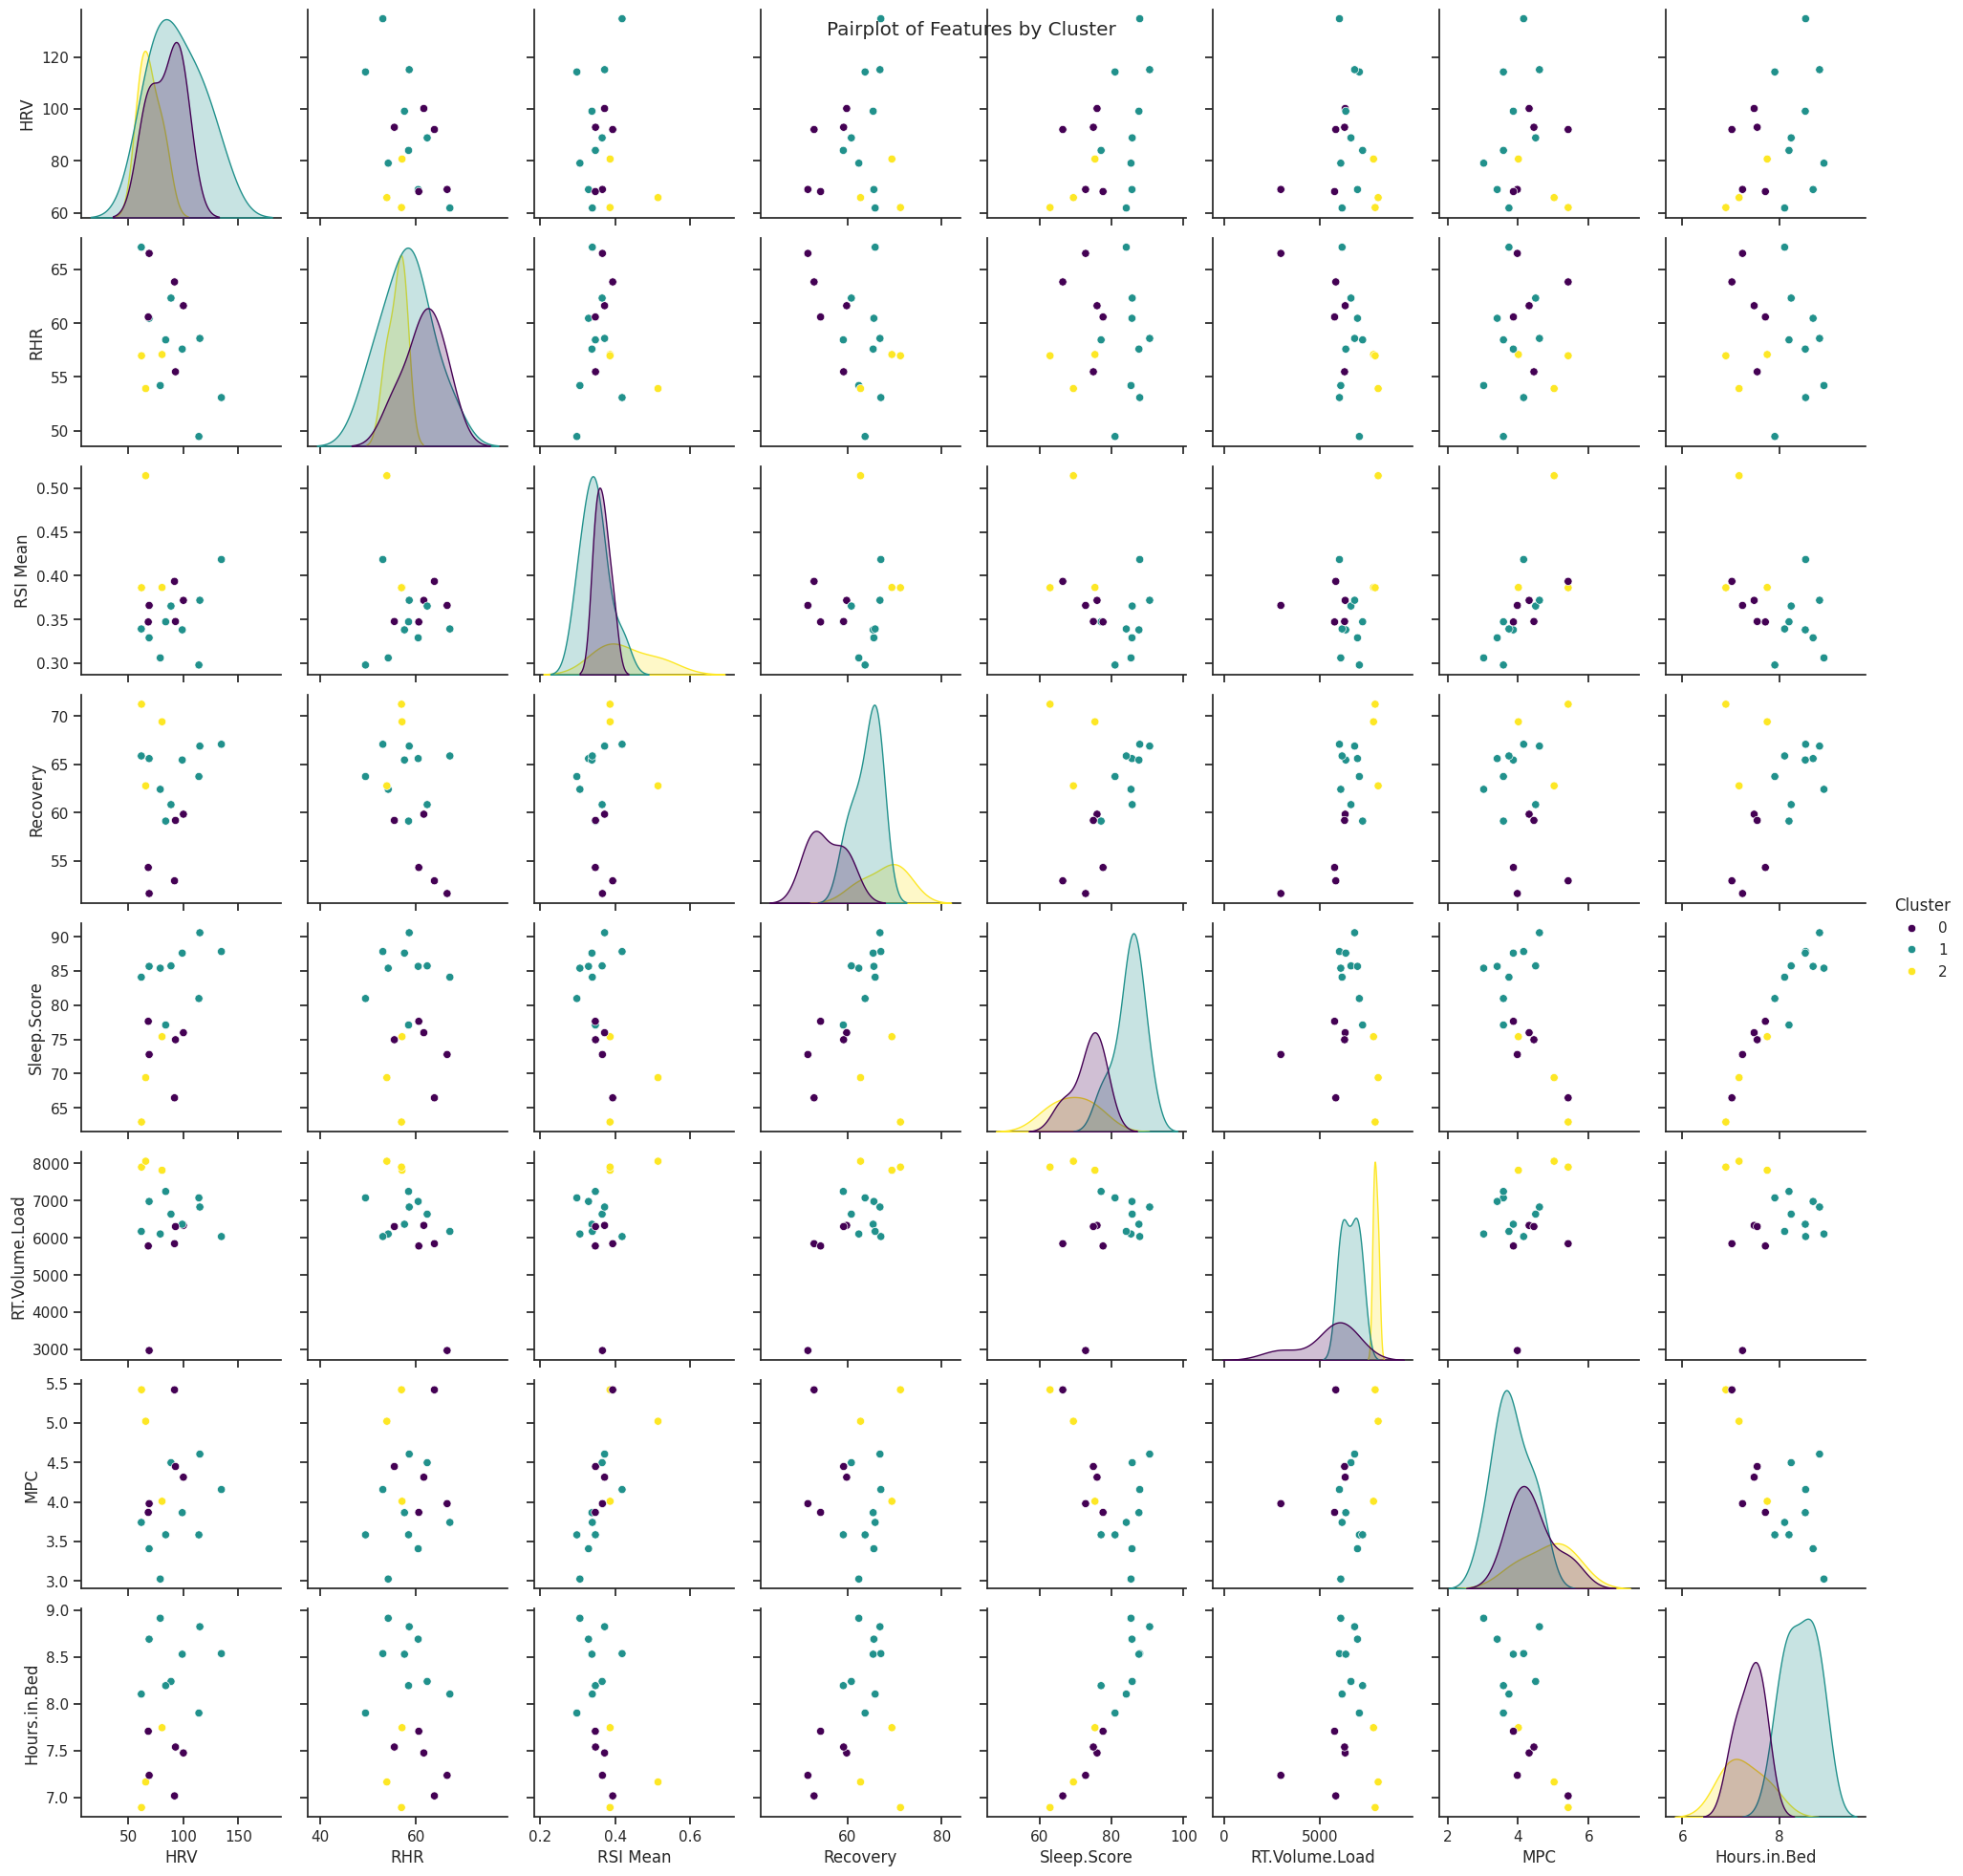

In [ ]:
import seaborn as sns

# Set the style of the pairplot
sns.set(style="ticks")

# Define the features for the pairplot
pairplot_features = ['HRV', 'RHR', 'RSI Mean', 'Recovery', 'Sleep.Score','RT.Volume.Load','MPC','Hours.in.Bed', 'Cluster']

# Create a pairplot
sns.pairplot(averaged_data[pairplot_features], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Features by Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, averaged_data['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Access inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Silhouette Score: 0.23258486746372234
Inertia: 70.15563442120009
